# New Section

Saving sales_dataset_with_missing.csv to sales_dataset_with_missing (7).csv

=== Data Cleaning ===

Missing values before cleaning:
Date           0
Product        0
Units_Sold    20
Unit_Price    15
Revenue       34
dtype: int64

Missing values after cleaning:
Date          0
Product       0
Units_Sold    0
Unit_Price    0
Revenue       0
dtype: int64
Product
Charger       2467.0
Phone         2188.0
Case          1858.0
Laptop        1841.0
Headphones    1829.0
Tablet        1551.0
Name: Units_Sold, dtype: float64
Product
Charger       1303187.91
Phone          979663.79
Case           978012.96
Laptop         898218.42
Tablet         787544.31
Headphones     773624.28
Name: Revenue, dtype: float64

Average monthly revenue: 336485.39


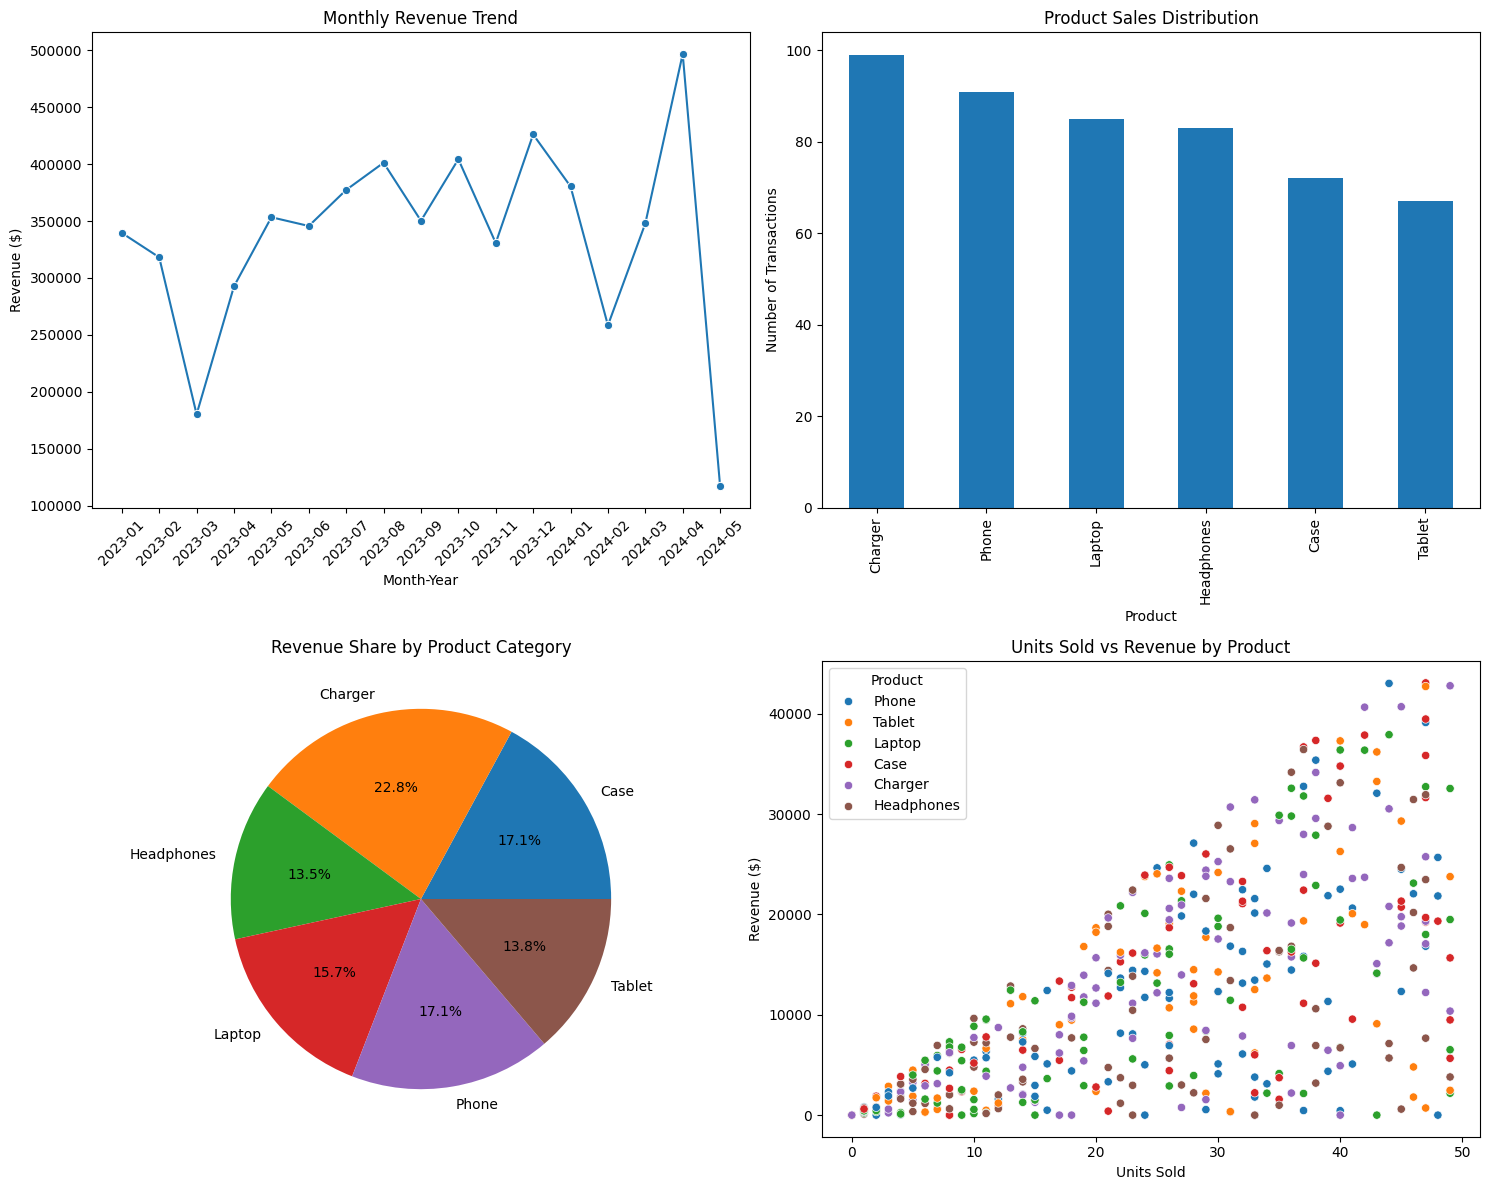

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Predicted revenue for month 18: $348,940.17


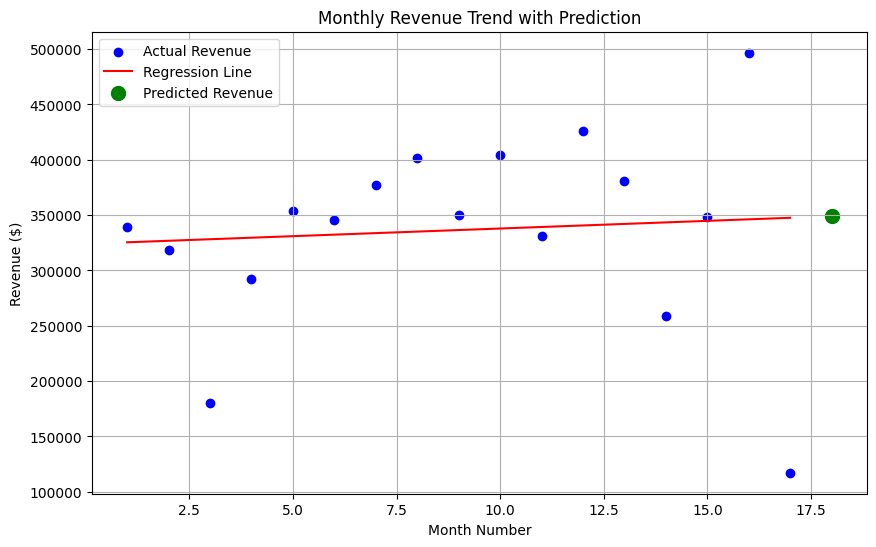


=== Key Insights ===
1. Top Performing Product by Revenue: Charger
2. Top Selling Product by Units: Charger
3. Average Monthly Revenue: $ 336485.39
4. Overall Revenue Trend: Increasing
5. Prediction for Next Month: Revenue will be approximately $ 348940.17

Recommendation: Focus on Charger as it generates the highest revenue, and Charger as it has the highest sales volume.


In [14]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import io

uploaded = files.upload()
uploaded_file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))


#Markdown
"""## 1. Data Cleaning

- Loaded sales dataset (500+ rows).
- Handled missing values by median filling.
- Converted 'Date' to datetime format.
- Removed duplicates.
- Calculated 'Revenue' column.
- Outliers handled using IQR method.
- Dataset ready for analysis.
"""


# ======================
# DATA CLEANING
# ======================
print("\n=== Data Cleaning ===")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill missing values (though dataset appears complete)
df.fillna(0, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle outliers using IQR for Revenue
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Revenue'] < (Q1 - 1.5*IQR)) | (df['Revenue'] > (Q3 + 1.5*IQR)))]

print("\nMissing values after cleaning:")
print(df.isnull().sum())

#Markdown
"""## 2. Exploratory Data Analysis (EDA)

- Analyzed sales performance.
- Identified top-selling products.
- Monthly sales trends visualized.
- Revenue contribution by product shown.
- Average monthly revenue calculated.
"""



df['Month-Year'] = df['Date'].dt.to_period('M')
top_products = df.groupby('Product')['Units_Sold'].sum().sort_values(ascending=False)
top_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

print(top_products)
print(top_revenue)
print("\nAverage monthly revenue:", df.groupby('Month-Year')['Revenue'].sum().mean().round(2))

monthly_sales = df.groupby('Month-Year').agg({
    'Revenue': 'sum',
    'Units_Sold': 'sum'
}).reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)



plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.lineplot(data=monthly_sales, x='Month-Year', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

plt.subplot(2, 2, 2)
df['Product'].value_counts().plot(kind='bar')
plt.title('Product Sales Distribution')
plt.xlabel('Product')
plt.ylabel('Number of Transactions')

plt.subplot(2, 2, 3)
df.groupby('Product')['Revenue'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Share by Product Category')
plt.ylabel('')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Units_Sold', y='Revenue', hue='Product')
plt.title('Units Sold vs Revenue by Product')
plt.xlabel('Units Sold')
plt.ylabel('Revenue ($)')

plt.tight_layout()
plt.show()


monthly_data = monthly_sales.copy()
monthly_data['Month_Num'] = range(1, len(monthly_data)+1)
X = monthly_data[['Month_Num']]
y = monthly_data['Revenue']
model = LinearRegression()
model.fit(X, y)

next_month = monthly_data['Month_Num'].max() + 1
prediction = model.predict([[next_month]])

print(f"Predicted revenue for month {next_month}: ${prediction[0]:,.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Revenue')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter([next_month], prediction, color='green', label='Predicted Revenue', s=100)
plt.title('Monthly Revenue Trend with Prediction')
plt.xlabel('Month Number')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid()
plt.show()



#Markdown
"""## 3. Sales Prediction

Simple Linear Regression model used to predict next month's revenue based on historical sales data.
"""

fig1 = px.line(monthly_sales, x='Month-Year', y='Revenue', title='Interactive Monthly Revenue Trend', labels={'Revenue': 'Revenue ($)'})
fig1.show()

fig2 = px.pie(df.groupby('Product')['Revenue'].sum().reset_index(), values='Revenue', names='Product', title='Interactive Revenue Share by Product', hole=0.3)
fig2.show()

fig3 = px.bar(df.groupby('Product').agg({'Units_Sold': 'sum', 'Revenue': 'sum'}).reset_index(), x='Product', y=['Units_Sold', 'Revenue'], title='Interactive Product Performance', barmode='group', labels={'value': 'Count/Amount', 'variable': 'Metric'})
fig3.show()

#Markdown
"""## 4. Bonus: Interactive Dashboard (Plotly)

KPIs and interactive visualizations for management decision-making.
"""

print("\n=== Key Insights ===")
print("1. Top Performing Product by Revenue:", top_revenue.idxmax())
print("2. Top Selling Product by Units:", top_products.idxmax())
print("3. Average Monthly Revenue: $", monthly_sales['Revenue'].mean().round(2))
print("4. Overall Revenue Trend:", "Increasing" if model.coef_[0] > 0 else "Decreasing")
print("5. Prediction for Next Month: Revenue will be approximately $", round(prediction[0], 2))
print("\nRecommendation: Focus on", top_revenue.idxmax(), "as it generates the highest revenue, and", top_products.idxmax(), "as it has the highest sales volume.")